#                                    Avocado Project

### Problem Statement:

**Avocado is a fruit consumed by people heavily in the United States.**

* The data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

* The data represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

* Starting in 2013, the data reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 
* The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

* The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Importing the basic Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


I have to predict the Price and then predict Region. To predict Price I will use Regression and for predicting Region I will use Classification.

# Variable Description

* Date — The date of the observation
* Average Price — the average price of a single avocado
* Type — conventional or organic
* Year — the year
* Region — the city or region of the observation
* Total Volume — Total number of avocados sold
* 4046 — Total number of avocados with PLU 4046 sold
* 4225 — Total number of avocados with PLU 4225 sold
* 4770 — Total number of avocados with PLU 4770 sold

# Exploratory Data Analysis

# 1- Data Exploration

In [3]:
df.shape

(18249, 14)

The Dataset contain 18249 rows and 14 columns.

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

* There are 14 columns

* The column unnamed can be removed as it does not have any effect on my model.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


* All the columns have no null values.

* We have 9 float type, 2 Int Type and 3 Object datatype.

* The Object datatype will be converted to Numerical during data cleaning.

* Date, type and Region are the object type

In [6]:
#checking Null values

df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no Null Values.

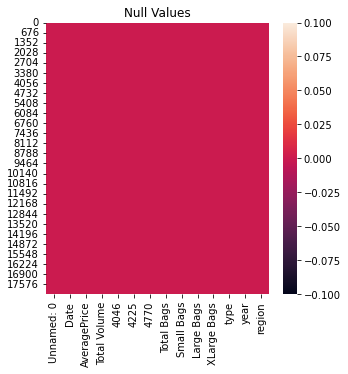

In [7]:
plt.figure(figsize=[5,5])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

As we can see that Heatmap shows No null values present in our dataset. Our dataset is good to go.

In [8]:
# number of unique values in each column

df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [9]:
#checking for empty observations

df.loc[df['Date'] == " "]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [10]:
df.loc[df['AveragePrice'] == " "]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [11]:
df.loc[df['type'] == " "]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [12]:
df.loc[df['region'] == " "]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


* There are no empty values in the Target columns- **AveragePrice** and **region**.
* **only 2 type** of avocadoes.
* The dataset has **4 Years** of avocado data.
* There are 54 regions where avocado has been sold

In [13]:
#checking the value counts of target columns

df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [14]:
df['region'].value_counts().sort_index(ascending=True)

Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
R

I wanted to check if any duplicates are there. There is no duplicate values or mistypes in target columns.

In [15]:
#describing the data.The description shows scientific values,so i am using-apply lamba format.

df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000
mean,24.23223,1.40598,850644.01301,293008.42453,295154.56836,22839.73599,239639.20206,182194.68670,54338.08814,3106.42651,2016.14790
std,15.48104,0.40268,3453545.35540,1264989.08176,1204120.40114,107464.06844,986242.39922,746178.51496,243965.96455,17692.89465,0.93994
min,0.00000,0.44000,84.56000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2015.00000
25%,10.00000,1.10000,10838.58000,854.07000,3008.78000,0.00000,5088.64000,2849.42000,127.47000,0.00000,2015.00000
50%,24.00000,1.37000,107376.76000,8645.30000,29061.02000,184.99000,39743.83000,26362.82000,2647.71000,0.00000,2016.00000
75%,38.00000,1.66000,432962.29000,111020.20000,150206.86000,6243.42000,110783.37000,83337.67000,22029.25000,132.50000,2017.00000
max,52.00000,3.25000,62505646.52000,22743616.17000,20470572.61000,2546439.11000,19373134.37000,13384586.80000,5719096.61000,551693.65000,2018.00000


Observations:
    
* All the features have count 18249.
* Mean and median are almost same for AveragePrice,Year.
* Mean and Median are different for **Total Volume, 4046, 4225, 4770, TotalBags, SmallBags, LargeBags, XLargeBags**.
* The **maximum AveragePrice is 3.25 and minimum AveragePrice is 0.44 in the dataset**.
* The Max Total Volume is 62,505,646 and minimum Total Volume value is 84.56.
* The dataset contains Data from **2015 to 2018**.

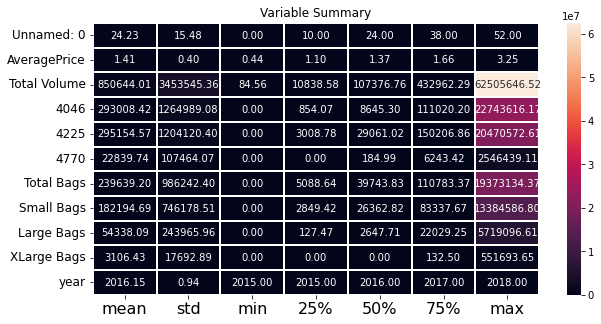

In [16]:
#Heatmap of the Descibe function

plt.figure(figsize=(10,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

The heatmap of Describe function shows that there might be a few outliers present in the data as the max values are very far from the 75% of the data.

In [17]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# 2- Feature Engineering

##### We have an unnamed column which is useless for our data. I am removing it.

In [18]:
#Droping Unnamed column
df = df.drop(["Unnamed: 0"],axis=1)

In [19]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### Date column is not in Date time datatype. I am changing it to datetime and I am extracting Day and Month from it.

In [20]:
df["Date"]=pd.to_datetime(df["Date"])

In [21]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Datatype of date is change to DateTime

In [22]:
#Extracting month from Date column

df["Month"]=df["Date"].dt.month

In [23]:
#Extracting day from Date column

df["Day"]=df["Date"].dt.day

In [24]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1,7


**Now we have 2 extra columns Day and Month**

In [25]:
#dropping the date column as we dont need it for further steps

df = df.drop(["Date"],axis=1)

In [26]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [27]:
#Checking the shape of the data now

df.shape

(18249, 14)

* **Our Data is now removed with Unnamed and Date column**
* **We have 2 new columns Day and Month**
* **We have 18249 rows and 14 columns for our Dataset**

# 3- Data Visualization

## a) Univariate Analysis

*We have Numerical as well as Categorical Data*

In [28]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [29]:
continuous_col=['AveragePrice','Total Volume','4046','4225','4770',
                'Total Bags','Small Bags','XLarge Bags']
Categorical_col=['type','year','region','Month','Day']

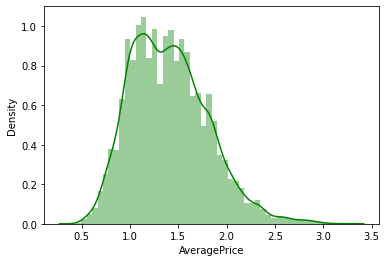

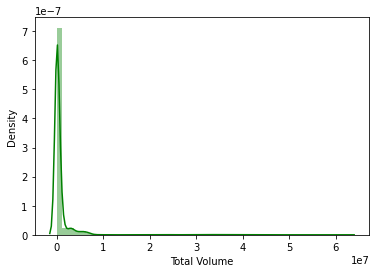

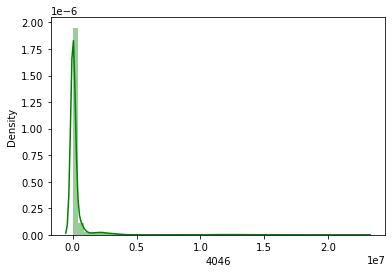

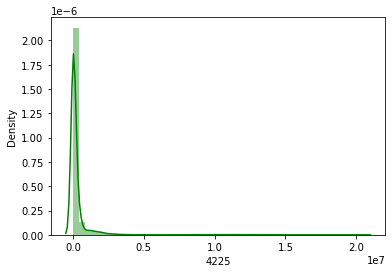

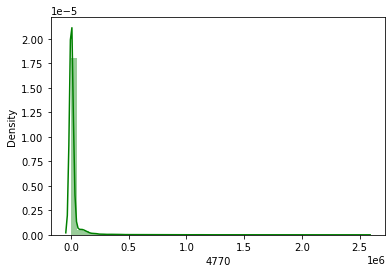

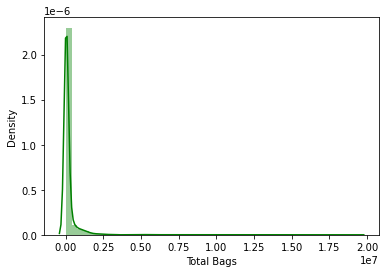

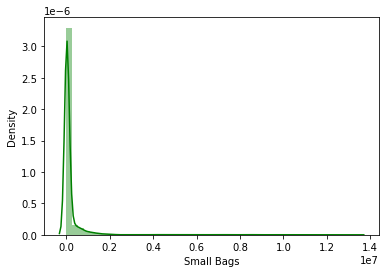

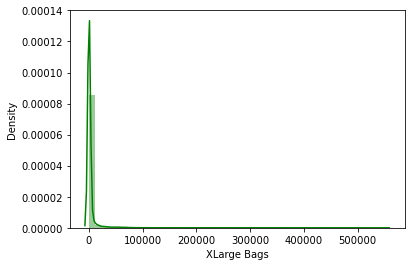

In [30]:
#Q1What is the distribution of data for numerical columns?

for i in df[continuous_col]:
    plt.figure()
    sns.distplot(df[i],color='g')

**Observations:**

* From above Plots, we can see that except for AveragePrice all other variables are right skewed or mean is greater than median.
* Average Price is normally distributed and only very minute skewness are present.
* We can check skewness and remove it at Data cleaning step.

<AxesSubplot:xlabel='type', ylabel='count'>

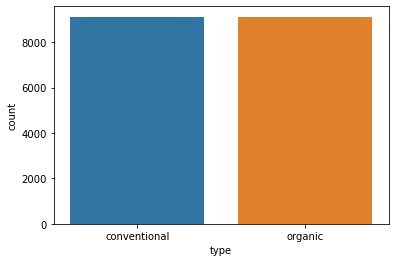

In [31]:
#Q2- What is the count of type of Avocadoes in the dataset?

sns.countplot(df['type'])

In [32]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

**We have 9126 Conventional and 9123 Organic type of avocadoes in the dataset.**

In [33]:
#Q3- How many datas are from each year starting from 2015 to 2018?

df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

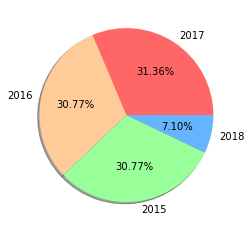

In [34]:
colors=['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
labels='2017','2016','2015','2018'
fig, ax = plt.subplots()
ax.pie(df['year'].value_counts(), labels=labels, autopct='%1.2f%%', colors=colors,shadow=True)
plt.show()

We have :
    
* **5722(31.36%) of datas from 2017**
* **5616(30.77%) of datas from 2016**
* **5615(30.77%) of datas from 2015**
* And only **1296(7.10%) of datas from 2018.**

**Only few datas from 2018 available in the dataset**

In [35]:
#Q4- Out of the given data which Day has the largest count?

df['Day'].value_counts()

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Day, dtype: int64

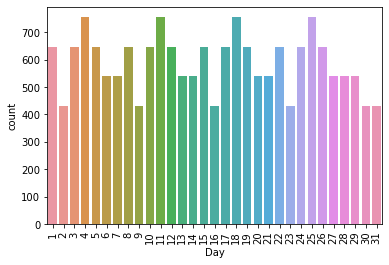

In [36]:
sns.countplot(df['Day'])
plt.xticks(rotation = 90)
plt.show()

**We can see that on days 4,11,18 and 25 we have more datas than other days**

In [37]:
#Q5- Out of the given data which month has the largest counts?

df['Month'].value_counts()

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64

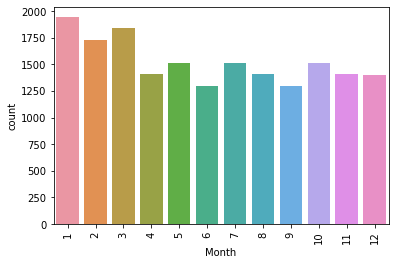

In [38]:
sns.countplot(df['Month'])
plt.xticks(rotation = 90)
plt.show()

**More number of datas are from months January, March and Febrauary respectively.** We can check further analysis with the target variable for better understanding.

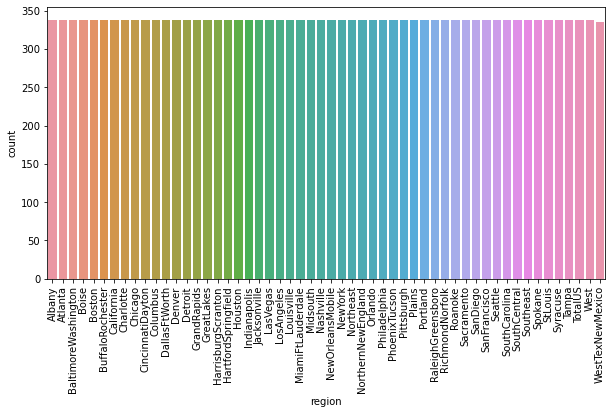

In [39]:
#Q6- Are the count of data of each region different?

plt.figure(figsize=(10,5))
sns.countplot(df['region'])
plt.xticks(rotation = 90)
plt.show()

**Datas are in equal number in terms of regions, except for WestTexNewMexico which has 3 number of data less than the others**

## b) Bivariate Analysis

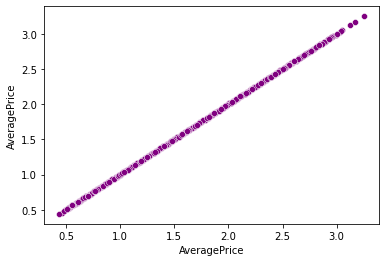

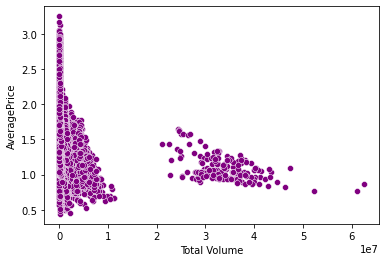

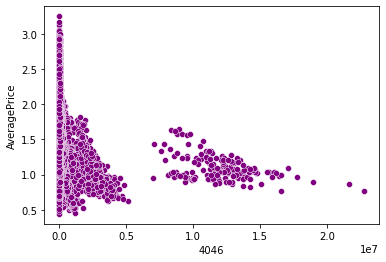

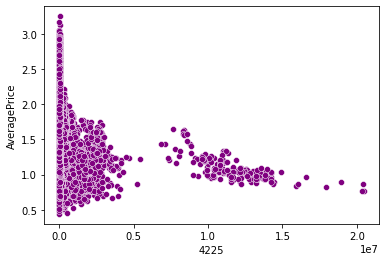

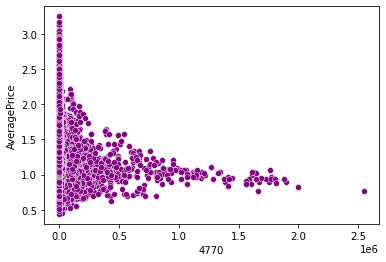

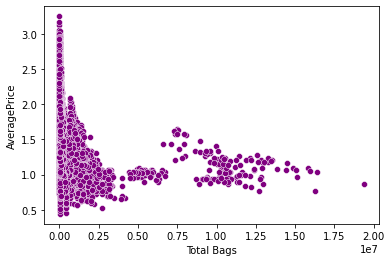

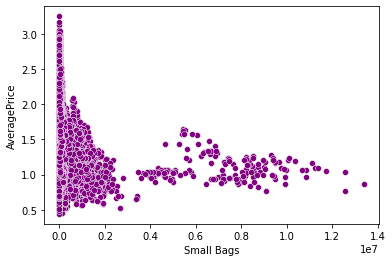

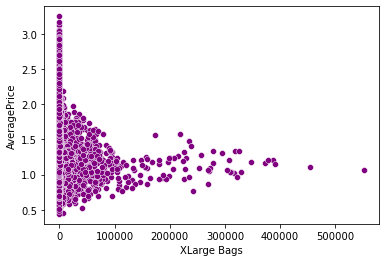

In [40]:
#Q7- What is the relation between numerical columns and the Target Variable?

for i in df[continuous_col]:
    plt.figure()
    sns.scatterplot(x=df[i],y=df.AveragePrice,color='purple')

**Observations:**

* We can see that none of the continuous columns have direct effect on Average Price.

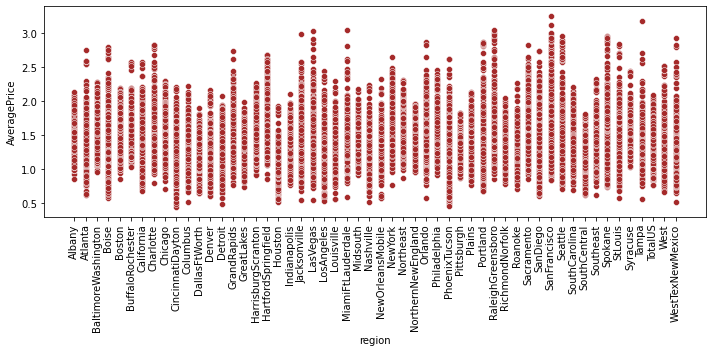

In [41]:
#Q8- Which are the Top regions where Average Price is higher?

plt.figure(figsize=(10,5))
sns.scatterplot(df.region, df.AveragePrice,color='brown')
plt.xticks(rotation = 90)
plt.tight_layout()

* **Regions with highest AveragePrice are Tampa, SanFrancisco, MiamiFtLauderdale, RaleighGreensboro**

* **Regions with lowest AveragePrice are PhoenixTucson, CincinnatiDayton, Detroit**

In [42]:
df.sort_values(['AveragePrice','region'],ascending=False).groupby('AveragePrice').head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
14125,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.00,0.00,organic,2016,SanFrancisco,10,30
17428,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.00,organic,2017,Tampa,4,16
14124,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.00,organic,2016,SanFrancisco,11,6
16055,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.00,organic,2017,MiamiFtLauderdale,3,12
16720,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.00,organic,2017,RaleighGreensboro,8,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015,PhoenixTucson,12,27
15262,0.49,44024.03,252.79,4472.68,0.00,39298.56,600.00,38698.56,0.00,organic,2017,CincinnatiDayton,2,26
15473,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.00,organic,2017,Detroit,3,5
7412,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,113752.17,330583.10,6030.56,conventional,2017,PhoenixTucson,2,5


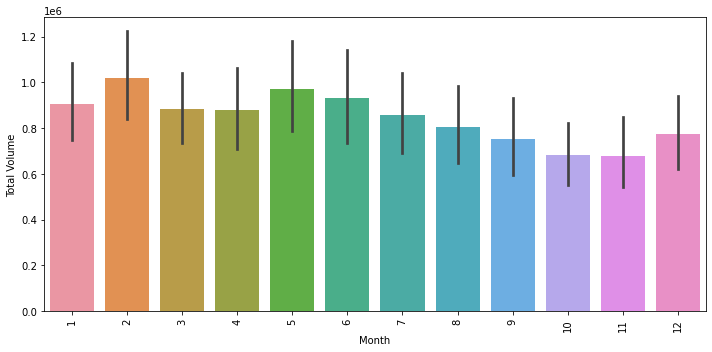

In [43]:
#Q9- In which month the average sales is highest?

plt.figure(figsize=(10,5))
sns.barplot('Month','Total Volume',data=df)
plt.xticks(rotation = 90)
plt.tight_layout()

* **We have Febrauary as the highest Total volume of Avocadoes sold in all 4 years**

* **We have lowest volume of avocadoes sold in the month of October in all 4 years**

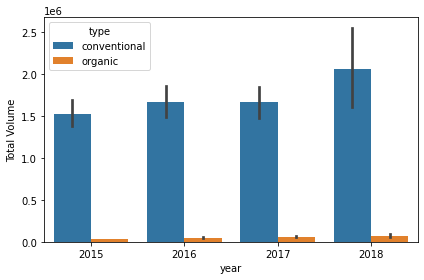

In [44]:
#Q10- In which year the volume of avocadoes sold is highest and which type?

sns.barplot('year','Total Volume',data=df,hue='type')
plt.tight_layout()

* **The total Volume is highest in the year 2018.**

* **We can clearly see that Conventional type of avocadoes are sold more than Organic.**

* **As the years passed, Volume of Organic avocadoes sold are increasing.**

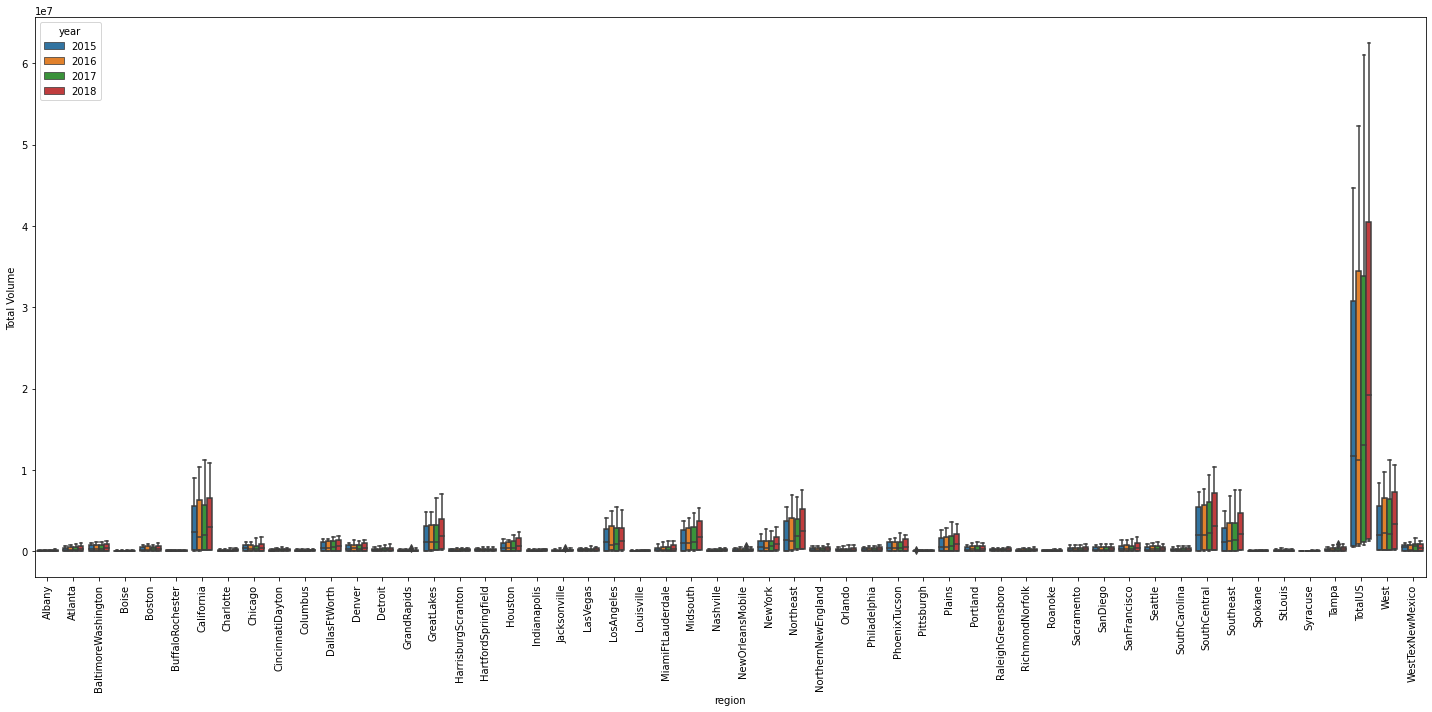

In [45]:
#Q11- Which region sold more volume of avocadoes?

plt.figure(figsize=(20,10))
sns.boxplot('region','Total Volume',data=df,hue='year')
plt.xticks(rotation = 90)
plt.tight_layout()

* **TotalUS region has the highest volume of avocadoes sold in all 4years.**
* **Syracuse region has the lowest volume of sales in all 4 years**

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

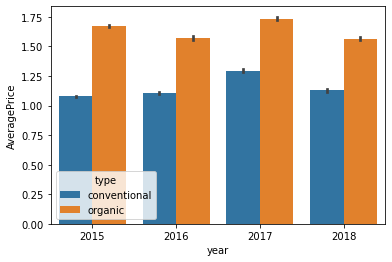

In [46]:
#Q12- In which year Average Price was maximum and which type?

sns.barplot('year','AveragePrice',data=df,hue='type')

* **In 2017, the average price of avocadoes were the highest for both conventional and organic**
* **The Avg price for organic were always high and the lowest was in the year 2016**
* **The Avg price of conventional type of avocadoes were lowest in the year 2015**

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

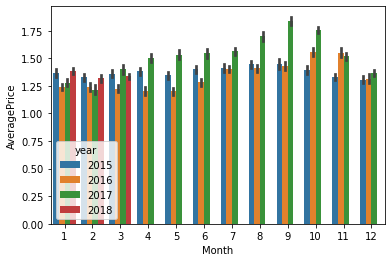

In [47]:
#Q13- In which month is the Average price the highest and which year?

sns.barplot('Month','AveragePrice',data=df,hue='year')

**Observations:**

* **This plot shows that the data in 2018 were only of 3 months.**
* **The Average Price was highest in 2017 for the month of September followed by October.**
* **The lowest average price was recorded in 2016 for the month of April and May**
* **There is a hike in Average price between the months August to October in all 4 years**

<AxesSubplot:xlabel='4046', ylabel='Total Volume'>

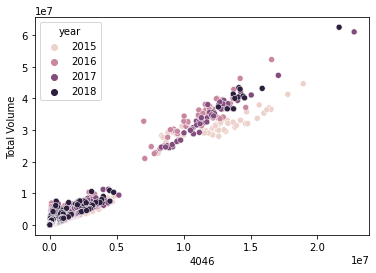

In [48]:
#Q14- What is the volume of 4046,4225,4770 in each year?

sns.scatterplot('4046','Total Volume',data=df,hue='year')

As 4046 increases, Total Volume also increases. The year 2018 have only few number of PLU4046

<AxesSubplot:xlabel='4225', ylabel='Total Volume'>

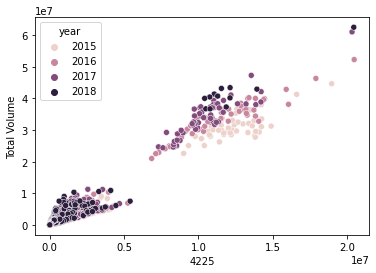

In [49]:
sns.scatterplot('4225','Total Volume',data=df,hue='year')

As 4225 increases, Total Volume also increases. The year 2018 have only few number of PLU4225

<AxesSubplot:xlabel='4770', ylabel='Total Volume'>

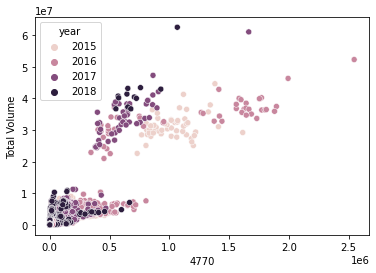

In [50]:
sns.scatterplot('4770','Total Volume',data=df,hue='year')

As 4770 increases, Total Volume also increases. The year 2018 have only few number of PLU4770

## c) Multivariate analysis

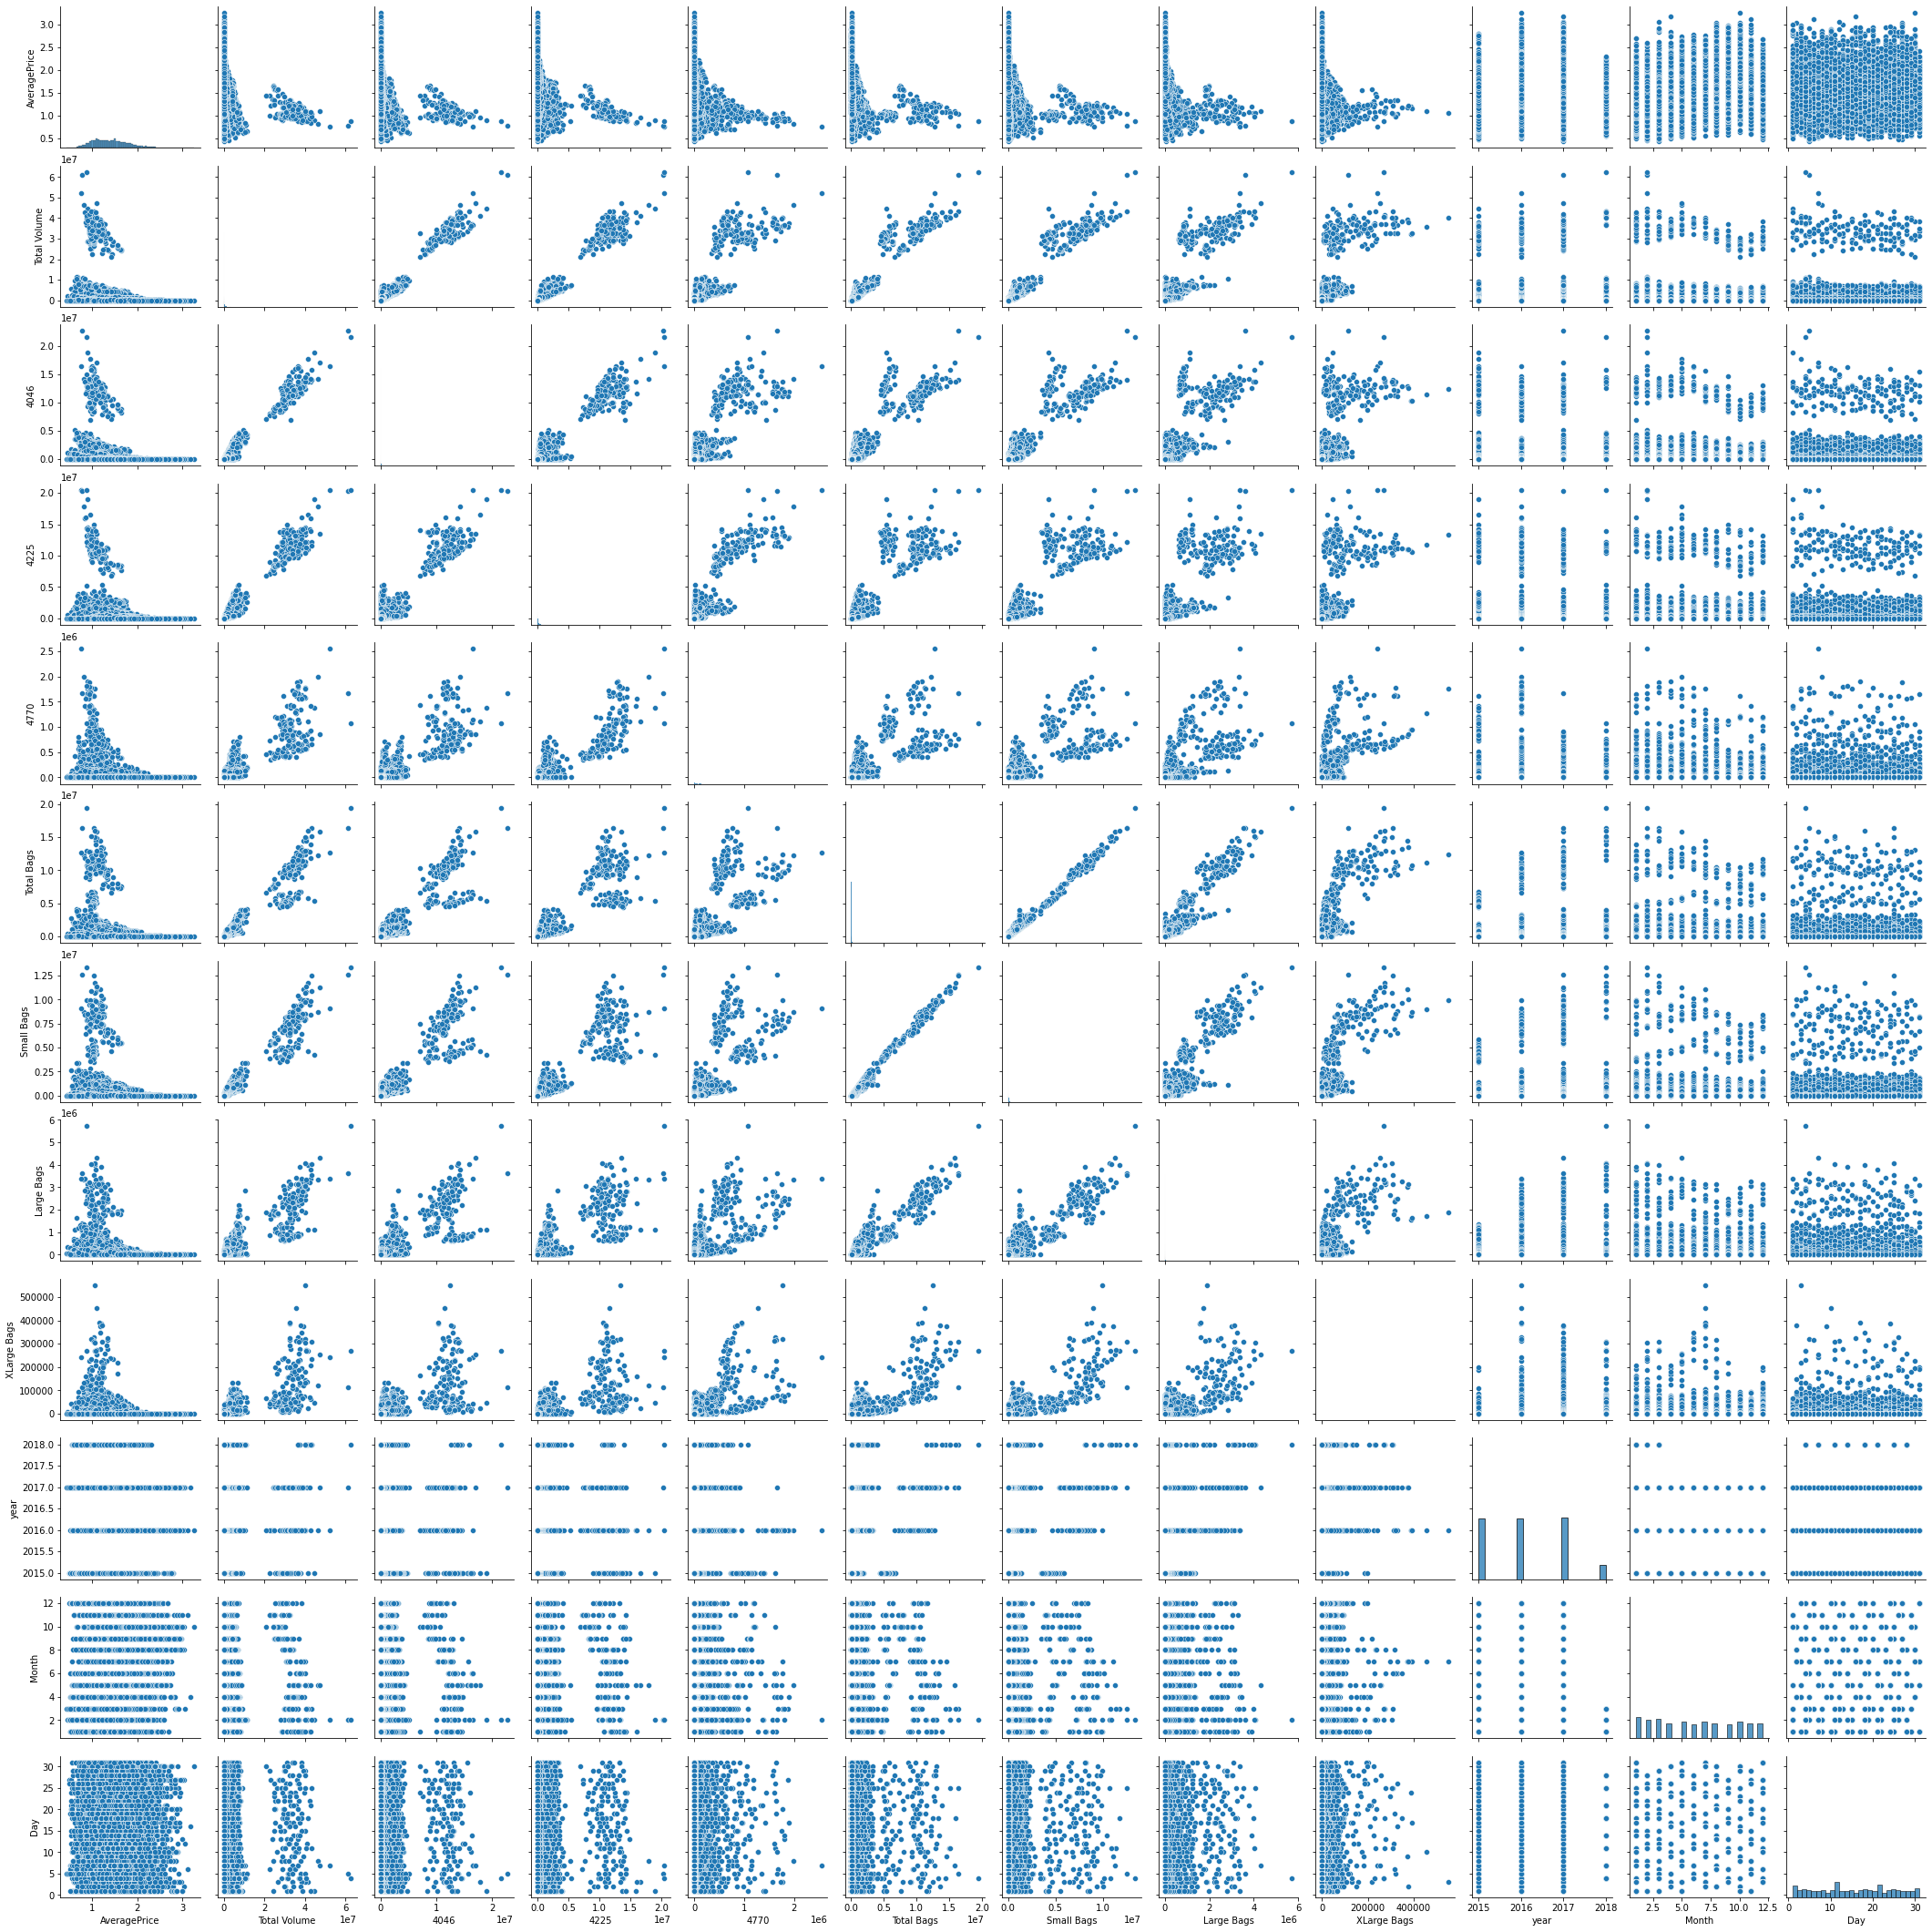

In [51]:
#Q15- Observe the Comparison between variables?

sns.pairplot(df)

**Observations:**
    
* The plot shows that variables are directly influencing the Average Price.
* As the Total Volume is Increasing, Price drops.
* when there is a demand and if the Volume of avocadoes is less, then the Average price is maximum.
* Similarly in case of Bags counts and Target, it shows that more the bags, lesser the Average price.
* There is multicollinearity among the columns

# 4- Data Cleaning

## a) Checking Outliers and removing them

<function matplotlib.pyplot.show(close=None, block=None)>

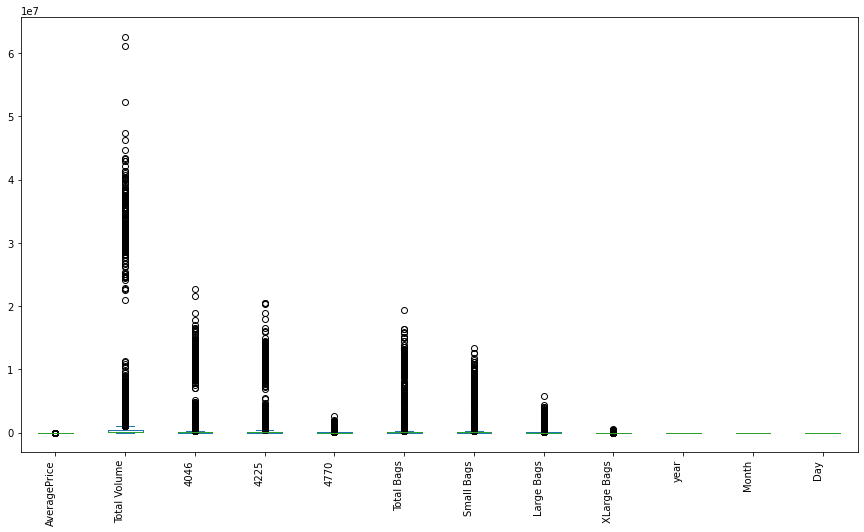

In [52]:
df.plot(kind='box',figsize=(15,8))
locs, labels = plt.xticks()

plt.setp(labels, rotation=90,horizontalalignment='right')

plt.show

* **All the columns except for Year,Month,Day have outliers.**
* **Total Volume column have very high number of Outliers**
* There are a few outliers in Target column which will not be treated.

### ZScore Method:

In [53]:
Out_cols=df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

from scipy.stats import zscore

z=np.abs(zscore(Out_cols))
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [54]:
print('old data shape:',df.shape)
print('new data shape:',df_new.shape)

old data shape: (18249, 14)
new data shape: (17782, 14)


In [55]:
#checking the loss percentage

loss_percentage=(((18249-17782)/18249)*100)
loss_percentage

2.55904433119623

**Data Loss percentage is only 2.55% which is below 10% and so we can proceed with this new Data**

## b) Skewness

In [56]:
#Checking the skewness of the Data

df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

**We have skewness in all columns except for Year, Day, Month**

### We have many Zero's(0's) in the data. we have to treat skewness for values with nonzero item.

In [57]:
df_new['4046'].value_counts()

0.00        242
3.00         10
4.00          8
1.00          8
1.24          8
           ... 
50330.36      1
46010.49      1
58973.85      1
95176.35      1
2894.77       1
Name: 4046, Length: 17235, dtype: int64

In [58]:
df_new['4225'].value_counts()

0.00        61
1.30         3
215.36       3
177.87       3
1.26         3
            ..
8224.80      1
13597.94     1
16472.11     1
16291.52     1
2356.13      1
Name: 4225, Length: 17636, dtype: int64

In [59]:
df_new['4770'].value_counts()

0.00        5497
2.66           7
3.32           7
1.64           6
1.59           6
            ... 
3867.40        1
10193.62       1
4774.82        1
9688.49        1
224.53         1
Name: 4770, Length: 11604, dtype: int64

In [60]:
df_new['Total Bags'].value_counts()

0.00        15
990.00       5
300.00       5
550.00       4
266.67       4
            ..
47262.67     1
50247.64     1
50045.59     1
51527.11     1
12014.15     1
Name: Total Bags, Length: 17630, dtype: int64

In [61]:
df_new['Small Bags'].value_counts()

0.00        159
203.33       11
223.33       10
533.33       10
70.00         8
           ... 
75284.64      1
75014.84      1
88862.29      1
88030.23      1
11988.14      1
Name: Small Bags, Length: 16854, dtype: int64

In [62]:
df_new['Large Bags'].value_counts()

0.00        2370
3.33         187
6.67          78
10.00         47
4.44          38
            ... 
70756.61       1
31311.21       1
56448.61       1
53584.50       1
26.01          1
Name: Large Bags, Length: 14615, dtype: int64

In [63]:
df_new['XLarge Bags'].value_counts()

0.00        12046
3.33           29
6.67           16
1.11           15
5.00           12
            ...  
4430.39         1
10761.81        1
8418.33         1
11095.48        1
24.18           1
Name: XLarge Bags, Length: 5129, dtype: int64

**Number of zero's in each feature**

* ['4046']-  242
* ['4770']-  61
* ['4225']-  5497
* ['Small Bags'] -  159
* ['Large Bags'] -  2370
* ['XLarge Bags']-  12046

In [64]:
#Using Power Transform 

skew_cols=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
from sklearn.preprocessing import PowerTransformer

transform = PowerTransformer(method='yeo-johnson')
df_new[skew_cols] = transform.fit_transform(df_new[skew_cols].values)

In [65]:
#Checking the skewness

df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

**Our skewness is almost removed from the dataset. we have a little skewness for XLarge Bags** 

In [66]:
#Removing skewness in XLarge Bags using log1p

df_new["XLarge Bags"]=np.log1p(df_new["XLarge Bags"])

In [67]:
#Checking the skewness again

df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

No we can proceed with other steps as our data is good to go. Since there are large number of 0 present in XLarge Bags we will have to either drop the column after checking multicollinearity.

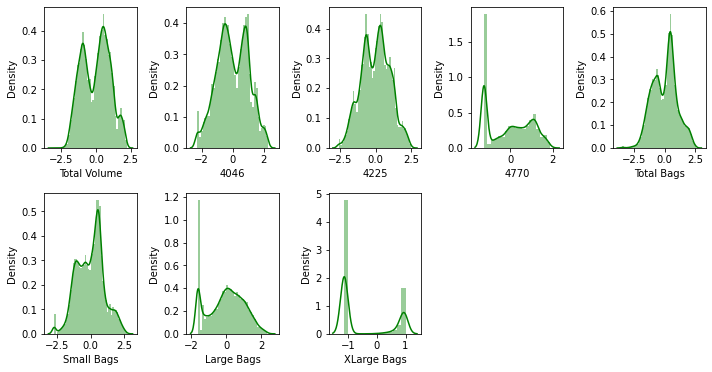

In [68]:
plt.figure(figsize=(10,10))
graph=1 

for column in df_new[skew_cols]:

    plt.subplot(4,5,graph)

    sns.distplot(df_new[column],color='green')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

**We still have skewness in the data as the columns contain lot of 0's**

## c) Encoding the Data

#### There are 2 columns Type and Region which are categorical in nature

In [69]:
cols=['type','region']

In [70]:
from sklearn.preprocessing import LabelEncoder
lencode = {}

for column in cols:
    lencode[column] = LabelEncoder()
    df_new[column] = lencode[column].fit_transform(df_new[column])

In [71]:
df_new['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17782, dtype: int64

In [72]:
df_new['type']

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 17782, dtype: int64

## d) Correlation

In [73]:
#Finding the Correlation

df_new.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885,0.010991
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044,-0.002469


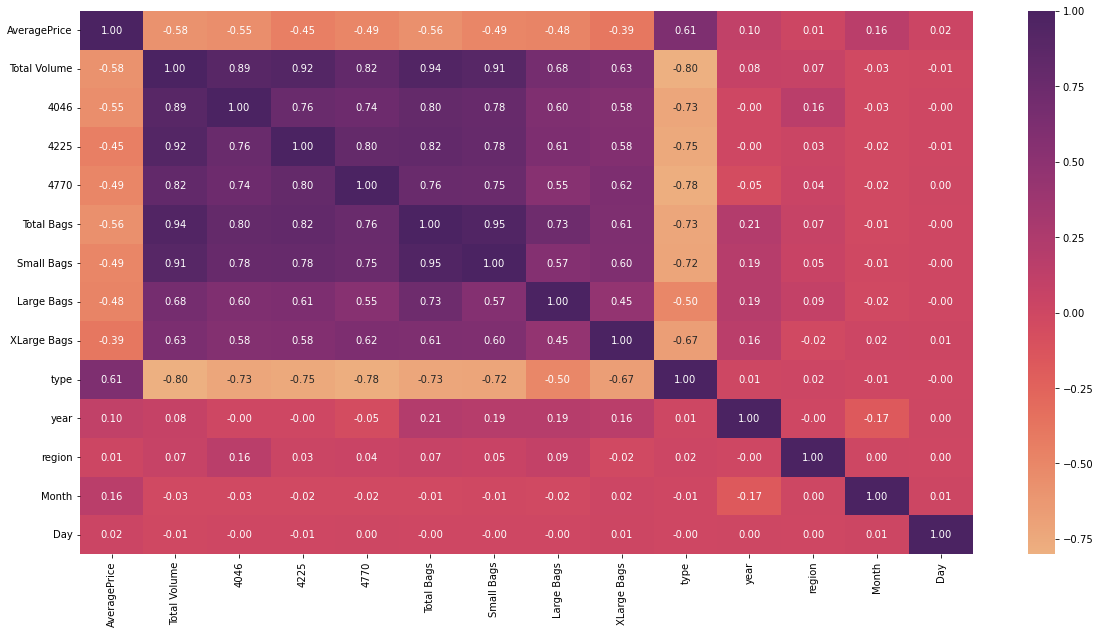

In [74]:
#Plotting the Heatmap of Correlation

corr = df_new.corr()
plt.figure(figsize=(20,10), facecolor='white')
sns.heatmap(corr, annot=True,cmap='flare',fmt='.2f')
plt.show()

Observations:
    
* The Target variable Average Price is highly correlated with type. as we know, organic is more priced than conventional.
* Average Price is negatively correlated with Total Volume, 4046,4225,4770,Total Bags, Small Bags, Large Bags and XLarge Bags.
* We can see high multicollinearity among the variables.
* Total Volume and Total Bags are highly correlated with each other.
* Total Bags and Small Bags are highly correlated with each other.
* Total Volume and Small Bags are highly correlated with each other.
* 4225 and Total Volume are highly correlated with each other.

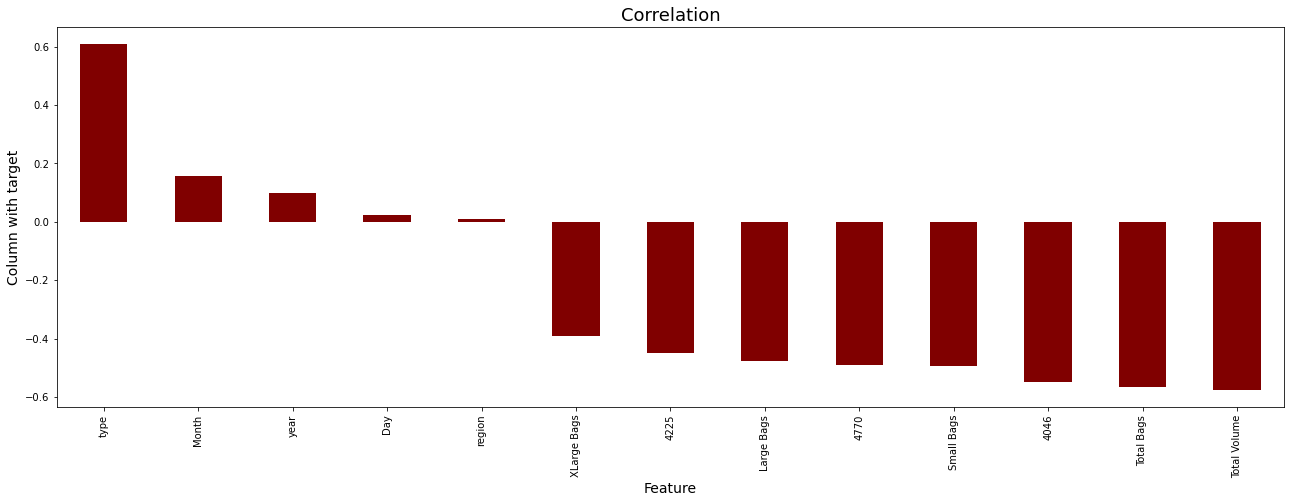

In [75]:
#Visualization of the Correlation Metrics

plt.figure(figsize=(22,7))
df_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='maroon')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

* **Plot of Correlation with Target Variable shows that we have a lot of negative correlation.**
* **Correlation with region, Day, Month and year are very less**
* Type and AveragePrice are highly correlated.

## e) Data Preprocessing

In [76]:
x=df_new.drop("AveragePrice",axis=1)
y=df_new['AveragePrice']

In [77]:
x.shape

(17782, 13)

In [78]:
y.shape

(17782,)

In [79]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12,27
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12,20
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12,13
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,12,6
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11,29


In [80]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

## f) Standardization of Data

In [81]:
from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()

x= pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [82]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,-1.698613,1.641434,1.289235
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,-1.698613,1.641434,0.491750
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,-1.698613,1.641434,-0.305734
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,-1.698613,1.641434,-1.103219
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,-1.698613,1.358706,1.517088


## g) VIF Factor

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [84]:
vif_calc()

    VIF Factor      features
0    52.135155  Total Volume
1     7.153503          4046
2    11.169208          4225
3     3.952932          4770
4    34.511208    Total Bags
5    16.637834    Small Bags
6     3.463222    Large Bags
7     2.071603   XLarge Bags
8     3.757823          type
9     1.386262          year
10    1.085394        region
11    1.054255         Month
12    1.000782           Day


In [85]:
#dropping Total Volume and Total Bags.
# Total Volume contain some data of other varieties of avocadoes(green skin) other than Hass
#but its only a minimal amount apart from the total of 4046,4225 and 4770.
#Total Bags are the sum of Small Bags, Large Bags and XLarge Bags

x = x.drop(["Total Volume"],axis=1)
x = x.drop(["Total Bags"],axis=1)

In [86]:
vif_calc()

    VIF Factor     features
0     3.723548         4046
1     4.139338         4225
2     3.938218         4770
3     4.101862   Small Bags
4     1.866016   Large Bags
5     2.058492  XLarge Bags
6     3.537738         type
7     1.359340         year
8     1.078629       region
9     1.051565        Month
10    1.000531          Day


### Our data is very clean and perfect for Model building

# 5- Building the Model

In [87]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Linear Regression

In [88]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.5263605268425318 seen for random state: 99


In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [90]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))

The r2 score is: 0.5263605268425318
The mean absolute error 0.2130989437975523
The mean squared error 0.07513853559469104


In [91]:
#Hyperparameter tuning for Linear Regression

par_grid =  {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lm = GridSearchCV(estimator=lm, param_grid=par_grid, cv=5,n_jobs=1, verbose=1)

grid_lm.fit(x_train, y_train)
print("The best estimators:", grid_lm.best_estimator_)
print("The best score:", grid_lm.best_score_)
print("The best parameters:", grid_lm.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
The best estimators: LinearRegression(normalize=True)
The best score: 0.5007952889429448
The best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [92]:
#RE INSTANTIATING WITH BEST PARAMETERS

grid_lm = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
grid_lm.fit(x_train, y_train)
y_pred1 = lm.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred1))
print('The mean absolute error', mean_absolute_error(y_test, y_pred1))
print('The mean squared error', mean_squared_error(y_test, y_pred1))

The r2 score is: 0.5263605268425318
The mean absolute error 0.2130989437975523
The mean squared error 0.07513853559469104


In [93]:
cv = cross_val_score(lm, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.08974438015781053


#### CV Score is very less compared to R2 Score.

### Ridge Regression

In [94]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    Rd = Ridge()
    Rd.fit(x_train,y_train)
    pred = Rd.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.5263594829521143 seen for random state: 99


In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [96]:
pred = Rd.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(Rd, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.5263594829521143
The mean absolute error 0.21309811973491438
The mean squared error 0.07513870119828142
The cross validation score 0.0897809659259368


**CV Score and R2 score is very less**

### KNN Regressor

In [97]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.8041462744789285 seen for random state: 49


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [99]:
pred_knn = knn.predict(x_test)

print('The r2 score is:', r2_score(y_test, pred_knn))
print('The mean absolute error', mean_absolute_error(y_test, pred_knn))
print('The mean squared error', mean_squared_error(y_test, pred_knn))

The r2 score is: 0.8498806902599785
The mean absolute error 0.11201911902530458
The mean squared error 0.024759832802249297


### We are getting a good score. Lets check the plot of y_test and Predicted

Text(0, 0.5, 'Predicted Y')

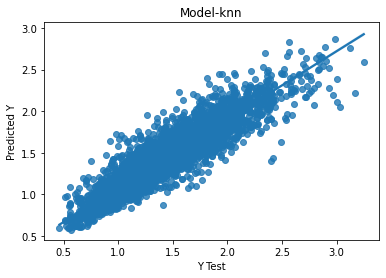

In [100]:
sns.regplot(x=y_test,y=pred_knn)
plt.title("Model-knn")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

The Plot is ok but we have to check CV score and error

### Random Forest Regressor

In [101]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rdf = RandomForestRegressor()
    rdf.fit(x_train,y_train)
    pred = rdf.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.890202146271924 seen for random state: 66


In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [103]:
pred_rdf = rdf.predict(x_test)

print('The r2 score is:', r2_score(y_test, pred_rdf))
print('The mean absolute error', mean_absolute_error(y_test, pred_rdf))
print('The mean squared error', mean_squared_error(y_test, pred_rdf))

The r2 score is: 0.9538241254325919
The mean absolute error 0.05419600749765699
The mean squared error 0.007549649298969072


In [104]:
#HyperParameter Tuning for Random Forest Regressor

from sklearn.model_selection import RandomizedSearchCV

parameters={'bootstrap': [True, False],
               'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 3, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230,300, 500]}

g=RandomizedSearchCV(RandomForestRegressor(),param_distributions = parameters,
                     cv = 5, n_iter = 10, n_jobs=-1)
g.fit(x_train,y_train)
print('The r2 score is:', r2_score(y_test, y_pred))
print("\n The best estimator across ALL searched params:\n", g.best_estimator_)
print("\n The best score across ALL searched params:\n", g.best_score_)
print("\n The best parameters across ALL searched params:\n",g.best_params_)

The r2 score is: -0.5060129146417474

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5,
                      n_estimators=230)

 The best score across ALL searched params:
 0.8769243453446691

 The best parameters across ALL searched params:
 {'n_estimators': 230, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}


In [106]:
rdf = RandomForestRegressor(max_depth=40, min_samples_leaf=2,min_samples_split=5,
                            max_features='sqrt',bootstrap= True,n_estimators=230)
rdf.fit(x_train,y_train)
pred_rdf = rdf.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred_rdf))
print('The mean absolute error', mean_absolute_error(y_test, pred_rdf))
print('The mean squared error', mean_squared_error(y_test, pred_rdf))

The r2 score is: 0.8736540606094914
The mean absolute error 0.10264087691538229
The mean squared error 0.020657270526726577


### We are getting a good score. Lets check the plot of y_test and Predicted

Text(0, 0.5, 'Predicted Y')

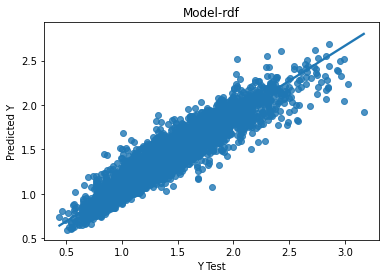

In [107]:
sns.regplot(x=y_test,y=pred_rdf)
plt.title("Model-rdf")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


### This is a very good model

### Support Vector Regressor

In [108]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    print('score:',sv.score(x_train,y_train))
    print('R2_score:',r2_score(y_test,pred))

score: 0.5083557482908411
R2_score: 0.5015792897882533
score: 0.6709294237066263
R2_score: 0.6550343945086432
score: 0.8009631279788293
R2_score: 0.7788431275582984


In [109]:
#rbf is giving me maximum score

svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print('R2_score:',r2_score(y_test,pred_svr))
print('score:',sv.score(x_train,y_train))
print('The mean absolute error', mean_absolute_error(y_test, pred_svr))
print('The mean squared error', mean_squared_error(y_test, pred_svr))

R2_score: 0.7788431275582984
score: 0.8009631279788293
The mean absolute error 0.1397829949080801
The mean squared error 0.03615864003949293


### We are getting a good score. Lets check the plot of y_test and Predicted

Text(0, 0.5, 'Predicted Y')

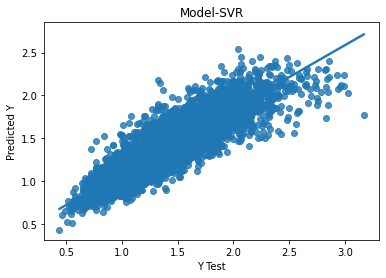

In [110]:
sns.regplot(x=y_test,y=pred_svr)
plt.title("Model-SVR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Scattered aroung a wide area.not good

### Decision Tree Regressor

In [111]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print('R2_score:',r2_score(y_test,pred_dtr))
print('score:',dtr.score(x_train,y_train))
print('The mean absolute error', mean_absolute_error(y_test, pred_dtr))
print('The mean squared error', mean_squared_error(y_test, pred_dtr))

R2_score: 0.7455971370114738
score: 1.0
The mean absolute error 0.13337394564198687
The mean squared error 0.04159428303655108


#### Lets check actual and predicted in plot

Text(0, 0.5, 'Predicted Y')

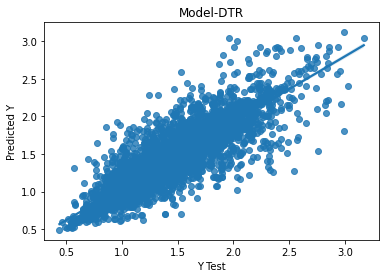

In [112]:
sns.regplot(x=y_test,y=pred_dtr)
plt.title("Model-DTR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

very much scattered

### SGD Regressor

In [113]:
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
cv = cross_val_score(sgd, x,y,cv=5)
print('The cross validation score', cv.mean())

R2_score: 0.5051969746246736
The cross validation score 0.07446032211153053


### ElasticNet Regressor

In [114]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    enr=ElasticNet(alpha=0.0001)
    enr.fit(x_train,y_train)
    pred = enr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.5263737910833033 seen for random state: 99


In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [116]:
enr.fit(x_train,y_train)

enrpred=enr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
cv = cross_val_score(sgd, x,y,cv=5)
print('The cross validation score', cv.mean())

R2_score: 0.5263737910833033
The cross validation score 0.11294897559975534


# Cross Validation

In [117]:
cv = cross_val_score(Rd, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.0897809659259368


In [118]:
cv = cross_val_score(knn, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.050613524097712116


In [119]:
cv = cross_val_score(rdf, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.30381603283280106


In [120]:
cv = cross_val_score(sgd, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.08227596672957291


In [121]:
cv = cross_val_score(svr, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.054625631181681955


In [122]:
cv = cross_val_score(dtr, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score -0.35780658072573135


In [123]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             ElasticNet(alpha=0.0001)]
            


names = ['LR','Rd','svr','svr_p','svr_r','RF','DTR','ENR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.089614, 0.027540
Rd    : 0.089612, 0.027543
svr    : 0.090925, 0.028216
svr_p    : 0.105809, 0.035975
svr_r    : 0.098091, 0.044920
RF    : 0.079889, 0.045397
DTR    : 0.128064, 0.047517
ENR    : 0.089610, 0.027571


## By checking the difference between model accuracy and CV Score and checking rmse_cv, I get Random Forest as the Final Model

In [124]:
Final_model = RandomForestRegressor(max_depth=20, min_samples_leaf=3,min_samples_split=5,
                            max_features='auto',bootstrap= True,n_estimators=230)
Final_model.fit(x_train,y_train)
pred_rdf = Final_model.predict(x_test)

print('The r2 score is:', r2_score(y_test, pred_rdf))
print('The mean absolute error', mean_absolute_error(y_test, pred_rdf))
print('The mean squared error', mean_squared_error(y_test, pred_rdf))


The r2 score is: 0.8722054989986362
The mean absolute error 0.10039022586966119
The mean squared error 0.020273419354776487


#### Hense we get accuracy of 87%

# Saving the Model

In [125]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_model,"Avocado.pkl")

['Avocado.pkl']

# Predictions

In [126]:
#load the model
model=joblib.load("Avocado.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.05565886, 0.77003337, 1.52222729, ..., 1.15002404, 1.02621048,
       1.57360362])

In [127]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted value","Actual value"])

,0,1,2,3,4,5,6,7,8,9,...,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334
Predicted value,1.055659,0.770033,1.522227,1.829648,1.160638,1.231502,1.734491,1.489489,0.985936,1.970553,...,1.649544,1.839917,1.189038,2.085071,1.249522,1.727846,1.206837,1.150024,1.02621,1.573604
Actual value,0.990000,0.840000,1.580000,1.750000,1.230000,1.300000,1.690000,1.510000,1.080000,2.180000,...,1.720000,1.810000,1.240000,2.240000,1.330000,1.690000,1.170000,1.170000,1.10000,1.740000


# The Values are almost Same

# Taking Region as target

In [128]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-1.126094,1,2018,53,2,4
18245,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-1.126094,1,2018,53,1,28
18246,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-1.126094,1,2018,53,1,21
18247,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-1.126094,1,2018,53,1,14


**By taking Region as target we have a classification Problem**

In [129]:
df_new.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885,0.010991
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044,-0.002469


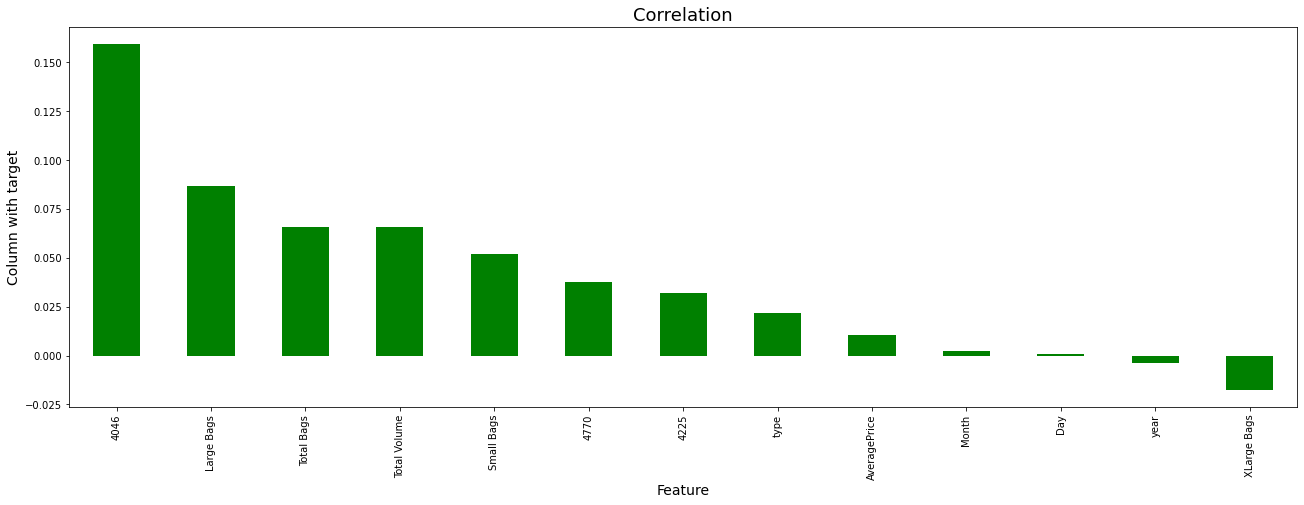

In [130]:
#Visualization of the Correlation Metrics

plt.figure(figsize=(22,7))
df_new.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='green')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

#### We have all positive correlation except for year and XLarge Bags

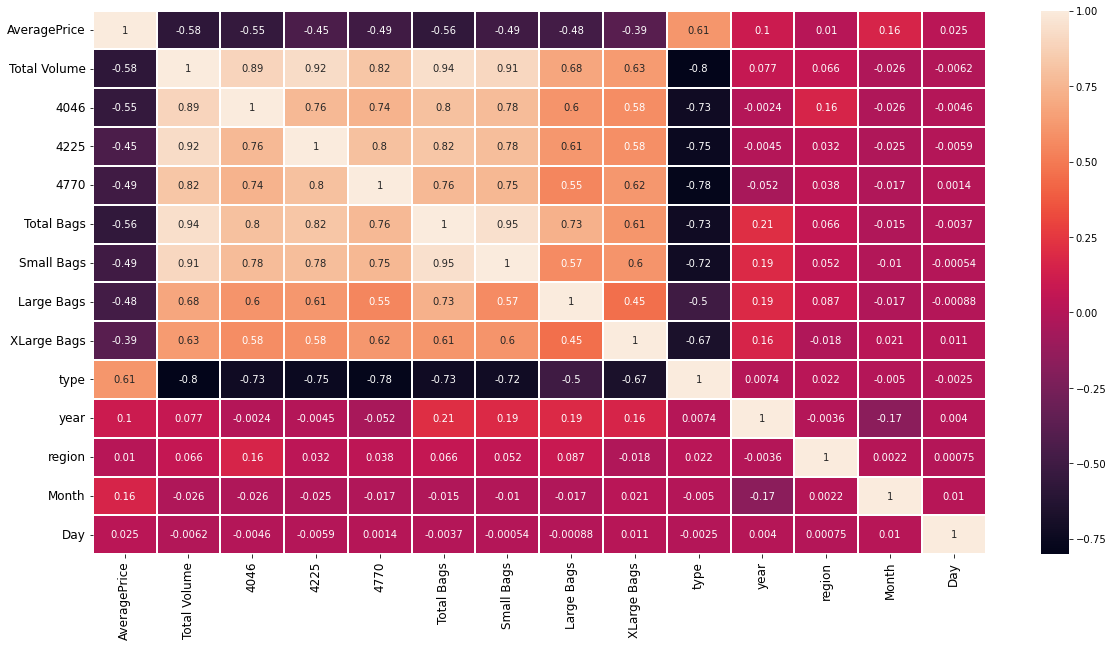

In [131]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),linewidths=.1,annot=True)
plt.yticks(rotation=0,fontsize=12);
plt.xticks(rotation=90,fontsize=12);

As we can see, region is not very much correlated with other variables. The highest correlation is with 4046 with 16%

In [132]:
#dropping day as it has no effect on my model

df_new = df_new.drop(["Day"],axis=1)

In [137]:
df_new.shape

(17782, 13)

# PreProcessing

In [133]:
x = df_new.drop("region",axis=1)
y = df_new["region"]

In [134]:
x.shape

(17782, 12)

In [135]:
y.shape

(17782,)

In [136]:
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,11


# Scaling the data

In [138]:
ssc=StandardScaler()
x = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

# Checking VIF

In [139]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [140]:
vif_calc()

    VIF Factor      features
0     2.267588  AveragePrice
1    53.085652  Total Volume
2     6.822227          4046
3    12.221955          4225
4     3.967956          4770
5    35.481059    Total Bags
6    17.222503    Small Bags
7     3.478675    Large Bags
8     2.065565   XLarge Bags
9     4.243050          type
10    1.537768          year
11    1.144184         Month


In [141]:
#dropping the columns Total Volume and Total Bags

x = x.drop(["Total Volume"],axis=1)
x = x.drop(["Total Bags"],axis=1)


In [142]:
vif_calc()

   VIF Factor      features
0    2.027265  AveragePrice
1    3.566528          4046
2    4.353226          4225
3    3.956842          4770
4    4.186147    Small Bags
5    2.067570    Large Bags
6    2.054625   XLarge Bags
7    4.079762          type
8    1.468256          year
9    1.131609         Month


Our data is now perfect and good to go

# Building the Model

In [143]:
#Classification problem

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

### Finding the best Random state for dt,rf,knn,svc,lr

In [144]:
#finding the best random state

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8071227741330834  on Random_state  71


In [147]:
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.92427366447985  on Random_state  6


In [148]:
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.5057169634489223  on Random_state  12


In [149]:
Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8134957825679475  on Random_state  79


* for DTC- Best accuracy is  0.8071227741330834  on Random_state  71
* for rf- Best accuracy is  0.92427366447985  on Random_state  6
* for lr- Best accuracy is  0.5057169634489223  on Random_state  12
* for knn- Best accuracy is  0.8134957825679475  on Random_state  79

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=71)


In [164]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

81.04967197750703


In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=6)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

92.2211808809747


In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=12)

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)       

50.571696344892224


In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=79)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)       

81.34957825679476


# Cross Validation

In [169]:
score=cross_val_score(dtc,x,y,cv=5)
score1=score.mean()
print("Cross_Val_Score of DTC:",score1)

Cross_Val_Score of DTC: 0.540093299765699


In [171]:
score=cross_val_score(rf,x,y,cv=5)
score2=score.mean()
print("Cross_Val_Score of rf:",score2)

Cross_Val_Score of rf: 0.6895670160993722


In [172]:
score=cross_val_score(lr,x,y,cv=5)
score3=score.mean()
print("Cross_Val_Score of lr:",score3)

Cross_Val_Score of lr: 0.3699277364015189


In [173]:
score=cross_val_score(knn,x,y,cv=5)
score4=score.mean()
print("Cross_Val_Score of knn:",score4)

Cross_Val_Score of knn: 0.46304843220152725


Text(0.5, 1.0, 'Cross Validation Scores')

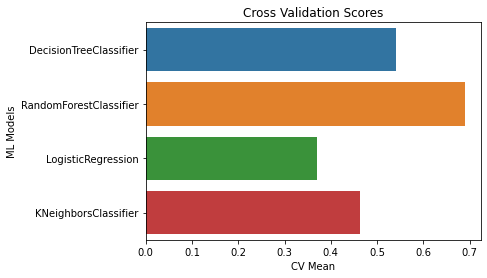

In [174]:
cv_result=[score1,score2,score3,score4]
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("CV Mean")
g.set_title("Cross Validation Scores")

## The difference between CV Score and accuracy Score is less compared to others. So I am taking RandomForest as best Model

In [176]:
Final_model=RandomForestClassifier()
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

91.86504217432052


In [181]:
#saving the model

import joblib
joblib.dump(Final_model,'Avocado_region.pkl')

['Avocado_region.pkl']

<AxesSubplot:>

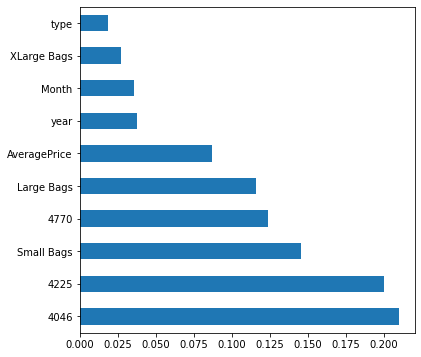

In [182]:
#Checking the feature importance

feat_importances = pd.Series(Final_model.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(6,6))

In [183]:
#load the model
model=joblib.load("Avocado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([20, 10,  5, ..., 32, 48, 28])

In [184]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted value","Actual value"])

,0,1,2,3,4,5,6,7,8,9,...,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334
Predicted value,20,10,5,43,14,4,11,11,28,44,...,15,10,21,22,3,29,9,32,48,28
Actual value,20,10,5,43,14,4,11,11,28,44,...,15,10,21,22,3,29,9,32,48,28


# It is exactly same